In [31]:
from tensorflow.keras.applications.
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout

In [32]:
inp = Input(shape=(224, 224, 3))
model = VGG16(include_top=False, weights="imagenet", input_tensor=inp)

In [33]:
for layer in model.layers:
    layer.trainable = False

In [69]:
X  = model.output
X = Flatten()(X)
X = Dense(4096, activation="relu")(X)
X = Dropout(.35)(X)
# X = Dense(512, activation="relu")(X)
# X = Dropout(.2)(X)
X = Dense(5, activation="softmax")(X)
nn = Model(inputs = model.input, outputs = X)

In [70]:
nn.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [71]:
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.preprocessing import image

In [72]:
initial_lrate = 0.01

import math
def decay(epoch, steps=100):
    init_rate = .01
    drop = .9
    epochs_drop = 4
    lrate = init_rate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

RMS = Adam(lr=initial_lrate)

scheduler = LearningRateScheduler(decay, verbose=True)

nn.compile(loss="categorical_crossentropy", optimizer=RMS, metrics=["accuracy"])

In [73]:
gen1 = image.ImageDataGenerator(samplewise_center=1, samplewise_std_normalization=1, zoom_range=.15, vertical_flip=True, horizontal_flip=True, brightness_range=[.15, 1], rotation_range=30)
gen2 = image.ImageDataGenerator(samplewise_center=1, samplewise_std_normalization=1)

In [74]:
train = gen1.flow_from_directory("SelfCutData/SelfCutData/", batch_size=20, target_size=(224, 224), shuffle=1)
test = gen2.flow_from_directory("SelfCutData/Test/", batch_size=20, target_size=(224, 224), shuffle=1)

Found 975 images belonging to 5 classes.
Found 235 images belonging to 5 classes.


In [75]:
hist = nn.fit_generator(train, validation_data=test, epochs=200, verbose=1, callbacks=[scheduler])

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 49 steps, validate for 12 steps

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/200
49/49 [==============================] - 16s 328ms/step - loss: 83.5992 - accuracy: 0.3979 - val_loss: 1.5365 - val_accuracy: 0.4340

Epoch 00002: LearningRateScheduler setting learning rate to 0.01.
Epoch 2/200
49/49 [==============================] - 16s 319ms/step - loss: 1.1142 - accuracy: 0.6082 - val_loss: 1.1534 - val_accuracy: 0.5021

Epoch 00003: LearningRateScheduler setting learning rate to 0.01.
Epoch 3/200
49/49 [==============================] - 15s 309ms/step - loss: 0.8740 - accuracy: 0.6800 - val_loss: 1.3002 - val_accuracy: 0.5447

Epoch 00004: LearningRateScheduler setting learning rate to 0.009000000000000001.
Epoch 4/200
49/49 [==============================] - 15s 308ms/step - loss: 0.8204 - accuracy: 0.6954 - val_loss: 0.9548 - val_accuracy: 0.6213

Epoch 00005: LearningRateScheduler setting learning rate to 0.009000000000000001.
Epoch 5/200
49

49/49 [==============================] - 12s 254ms/step - loss: 0.4491 - accuracy: 0.8267 - val_loss: 0.6157 - val_accuracy: 0.7915

Epoch 00038: LearningRateScheduler setting learning rate to 0.003874204890000001.
Epoch 38/200
49/49 [==============================] - 12s 254ms/step - loss: 0.4347 - accuracy: 0.8246 - val_loss: 0.7339 - val_accuracy: 0.7149

Epoch 00039: LearningRateScheduler setting learning rate to 0.003874204890000001.
Epoch 39/200
49/49 [==============================] - 12s 254ms/step - loss: 0.4201 - accuracy: 0.8338 - val_loss: 0.6000 - val_accuracy: 0.8000

Epoch 00040: LearningRateScheduler setting learning rate to 0.003486784401000001.
Epoch 40/200
49/49 [==============================] - 12s 254ms/step - loss: 0.3635 - accuracy: 0.8626 - val_loss: 0.7833 - val_accuracy: 0.7277

Epoch 00041: LearningRateScheduler setting learning rate to 0.003486784401000001.
Epoch 41/200
49/49 [==============================] - 12s 255ms/step - loss: 0.3442 - accuracy: 0.867

49/49 [==============================] - 13s 256ms/step - loss: 0.1958 - accuracy: 0.9272 - val_loss: 0.7960 - val_accuracy: 0.7830

Epoch 00074: LearningRateScheduler setting learning rate to 0.0015009463529699917.
Epoch 74/200
49/49 [==============================] - 12s 254ms/step - loss: 0.1832 - accuracy: 0.9282 - val_loss: 0.7230 - val_accuracy: 0.8043

Epoch 00075: LearningRateScheduler setting learning rate to 0.0015009463529699917.
Epoch 75/200
49/49 [==============================] - 12s 254ms/step - loss: 0.1938 - accuracy: 0.9231 - val_loss: 0.6616 - val_accuracy: 0.8128

Epoch 00076: LearningRateScheduler setting learning rate to 0.0013508517176729928.
Epoch 76/200
49/49 [==============================] - 12s 254ms/step - loss: 0.1828 - accuracy: 0.9364 - val_loss: 0.7133 - val_accuracy: 0.8085

Epoch 00077: LearningRateScheduler setting learning rate to 0.0013508517176729928.
Epoch 77/200
49/49 [==============================] - 12s 255ms/step - loss: 0.1911 - accuracy: 0

49/49 [==============================] - 12s 255ms/step - loss: 0.1675 - accuracy: 0.9303 - val_loss: 0.8815 - val_accuracy: 0.8085

Epoch 00110: LearningRateScheduler setting learning rate to 0.000581497370030401.
Epoch 110/200
49/49 [==============================] - 12s 254ms/step - loss: 0.1421 - accuracy: 0.9446 - val_loss: 0.8493 - val_accuracy: 0.8128

Epoch 00111: LearningRateScheduler setting learning rate to 0.000581497370030401.
Epoch 111/200
49/49 [==============================] - 12s 254ms/step - loss: 0.1300 - accuracy: 0.9467 - val_loss: 0.8204 - val_accuracy: 0.8000

Epoch 00112: LearningRateScheduler setting learning rate to 0.000523347633027361.
Epoch 112/200
49/49 [==============================] - 12s 254ms/step - loss: 0.1298 - accuracy: 0.9497 - val_loss: 0.8327 - val_accuracy: 0.8085

Epoch 00113: LearningRateScheduler setting learning rate to 0.000523347633027361.
Epoch 113/200
49/49 [==============================] - 12s 254ms/step - loss: 0.1140 - accuracy: 0


Epoch 00145: LearningRateScheduler setting learning rate to 0.00022528399544939195.
Epoch 145/200
49/49 [==============================] - 12s 254ms/step - loss: 0.0916 - accuracy: 0.9662 - val_loss: 0.8564 - val_accuracy: 0.8000

Epoch 00146: LearningRateScheduler setting learning rate to 0.00022528399544939195.
Epoch 146/200
49/49 [==============================] - 12s 254ms/step - loss: 0.1258 - accuracy: 0.9508 - val_loss: 0.8562 - val_accuracy: 0.8043

Epoch 00147: LearningRateScheduler setting learning rate to 0.00022528399544939195.
Epoch 147/200
49/49 [==============================] - 13s 260ms/step - loss: 0.1076 - accuracy: 0.9528 - val_loss: 0.8595 - val_accuracy: 0.8043

Epoch 00148: LearningRateScheduler setting learning rate to 0.00020275559590445276.
Epoch 148/200
49/49 [==============================] - 12s 255ms/step - loss: 0.0983 - accuracy: 0.9631 - val_loss: 0.8634 - val_accuracy: 0.8043

Epoch 00149: LearningRateScheduler setting learning rate to 0.0002027555959

In [77]:
nn.evaluate_generator(gen2.flow_from_directory("LISC_Database/Main_Dataset", target_size=(224, 224), shuffle=True, batch_size=25), verbose=1)

Found 242 images belonging to 5 classes.
  ...
    to  
  ['...']


  ...
    to  
  ['...']


10/10 [==============================] - 2s 168ms/step - loss: 3.9657 - accuracy: 0.4711


[3.965739059448242, 0.47107437]

In [78]:
import matplotlib.pyplot as plt

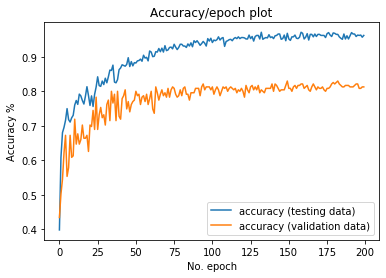

In [80]:
plt.plot(hist.history['accuracy'], label='accuracy (testing data)')
plt.plot(hist.history['val_accuracy'], label='accuracy (validation data)')
plt.title('Accuracy/epoch plot')
plt.ylabel('Accuracy %')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

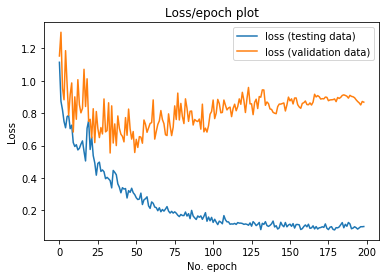

In [91]:
plt.plot(hist.history['loss'][1:], label='loss (testing data)')
plt.plot(hist.history['val_loss'][1:], label='loss (validation data)')
plt.title('Loss/epoch plot')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()